### Himmelblau function

minimize the function z where z = (x^2 + y -11)^2 + (x + y^2 - 7)^2 and where −6 ≤ 𝑥 ≤ 6 and −6 ≤ 𝑦 ≤ 6. 


- Binary string; (0, 1)
- Selection: roulette wheel selection or tournament selection
- Cross over: single point, uniform or other type of crossover operator
- Mutation: bit flip or 2-opt mutation use a form of roulette wheel selection or tournament selection.


In [1]:
#import libraries 
import numpy as np
import matplotlib.pyplot as plt
import time
import random
np.random.seed(777)

#“Himmelblau function”
def himmelblau(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def newfunc(x,y):
    return 0.5*((x**4)+(y**4)-(16*x**2)- (16*y**2)+(5*x)+(y*5))
# Step 1 - select GA parameters; pc, pm, n, g_max
# define pc; the probability of crossover 
#pc = 1.0

# define pm; the probability of mutation 
#pm = 0.6

# define n; the population size 
#so i is 0 to n 
n = 100

# define g_max; the max number of generations 
#g_max = 150

#length of the chromosome
chromosome_length = 8

#precision 
lower_b = -6
upper_b = 6
precision = ((upper_b) - (lower_b))/((2**chromosome_length)-1)
        
#%% define a function for generating chromosome randomely 
def generate_chromosome(n):
    # the initial population size is "number", each has "chromosome_length"
    sizeof_population = (n, chromosome_length) 
    #initialize binary population with defined size 
    population = np.random.randint(0, 2, sizeof_population)
    return population 

#%% define a function to decode a chromosome
def decoder(population):
    
    #x = [[0, 1, 0, 0, 0, 1], [1, 1, 0, 0, 1, 0], [1, 1, 1, 0, 0, 0]]
    # divide a chromsome to x and y sections
    m = int(population.shape[1]/2)
    x = population[:,:m]
    y = population[:,m:]

    # make a dictionary 
    dic_result_x= {}
    
    # we define k; how to read the index for binary compuattion
    for i in range (len(x)):  
       k = list(range(len(x[i])-1,-1,-1)) # first-1 :start , second -1: stop, third -1: step size which is 1
       for j in range(len(x[i])): 
          
           #binary computation 
           p = [np.sum((2**k[j])*(x[i][j]))]
#           print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
#           print(i, j, ' | x[i][j]: ', x[i][j], ' | 2**j= ', 2**j,  '| p= ', p)                
#           print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
#           
           #to add the first index into the binary computation
           if i in dic_result_x:
#               print('i= ', i, '| j= ', j, '| ', dic_result_x, 'yes')
               dic_result_x[i] =  dic_result_x[i] + p[0]
           else:
#               print('i= ', i, '| j= ', j, '| ', dic_result_x, p[0])
               dic_result_x[i] =  p[0]    
    
    # time.sleep(2)
    
    dic_result_x
        

    #same as x
    dic_result_y = {}
    
    for i in range (len(y)):  
       k = list(range(len(y[i])-1,-1,-1))
       for j in range(len(y[i])):
           
           p = [np.sum((2**k[j])*(y[i][j]))]
#           print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
#           print(i, j, ' | y[i][j]: ', y[i][j], ' | 2**j= ', 2**j,  '| p= ', p)                
#           print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
               
           if i in dic_result_y:
#               print('i= ', i, '| j= ', j, '| ', dic_result_y, 'yes')
               dic_result_y[i] =  dic_result_y[i] + p[0]
           else:
#               print('i= ', i, '| j= ', j, '| ', dic_result_y, p[0])
               dic_result_y[i] =  p[0]    
    
    #decoding x 
    decode_x={}
    for i in range (len(x)):
        decode_x[i]= (dic_result_x[i]*precision) + (lower_b)
        #print (i, decode_x[i])
        
    # decoding_y
    decode_y={}
    for i in range (len(y)):
        decode_y[i]= (dic_result_y[i]*precision) + (lower_b)
#        print (i, decode_y[i])
        
    solutions={}
    for i in range (len(x)):
       solutions[i] = himmelblau(decode_x[i], decode_y[i])
#       print(i, decode_x[i], decode_y[i], solutions[i])
#       print('======================================================================')
#    
    # find the min value in the fitness values 
    key_min = min(solutions.keys(), key=(lambda k: solutions[k]))
    #best_fitness = min(solutions, key = solutions.get)
    best_fit = solutions[key_min]
#   print("best fintness is:", best_fit)
################################################################################################################
    return best_fit
#%% define a function for crossover parents
def crossover(parent_0, parent_1):
   
    #random cut point 
    cut_point = np.random.randint(0,len(parent_0))
    child_0 = parent_0[:cut_point]          
    child_0 = np.append(child_0, parent_1[cut_point:])
    child_1 = parent_1[:cut_point]
    child_1 = np.append(child_1, parent_0[cut_point:])
    return (child_0, child_1)

#%% define the mutation function with a probability of mutation pm 
def mutation(child, pm):

    for point in range(len(child)):
        rand_mut = np.random.random_sample()
        if (rand_mut < pm):
            child[point] = 1 if child[point] == 0 else 0   #bit flip method
    return child    

#%% generate chromosome x
#x = [[0, 1, 0, 0, 0, 1], [1, 1, 0, 0, 1, 0], [1, 1, 1, 0, 0, 0]]
x = generate_chromosome(n)

dic_result_x= {}

for i in range (len(x)):  
   k = list(range(len(x[i])-1,-1,-1))
   for j in range(len(x[i])):
#    for j in range(len(x[i])-1,-1,-1):    
       
       p = [np.sum((2**k[j])*(x[i][j]))]
#       print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
#       print(i, j, ' | x[i][j]: ', x[i][j], ' | 2**j= ', 2**j,  '| p= ', p)                
#       print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
#           
       if i in dic_result_x:
#           print('i= ', i, '| j= ', j, '| ', dic_result_x, 'yes')
           dic_result_x[i] =  dic_result_x[i] + p[0]
       else:
#           print('i= ', i, '| j= ', j, '| ', dic_result_x, p[0])
           dic_result_x[i] =  p[0]    

# time.sleep(2)

dic_result_x
#generate chromosome y
    #%%
y = generate_chromosome(n)

dic_result_y = {}

for i in range (len(y)):  
   k = list(range(len(y[i])-1,-1,-1))
   for j in range(len(y[i])):
#    for j in range(len(x[i])-1,-1,-1):    
       
       p = [np.sum((2**k[j])*(y[i][j]))]
#       print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
#       print(i, j, k,  ' | y[i][j]: ', y[i][j], ' | 2**j= ', 2**j,  '| p= ', p)                
#       print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
#           
       if i in dic_result_y:
#           print('i= ', i, '| j= ', j, '| ', dic_result_y, 'yes')
           dic_result_y[i] =  dic_result_y[i] + p[0]
       else:
#           print('i= ', i, '| j= ', j, '| ', dic_result_y, p[0])
           dic_result_y[i] =  p[0]    

# time.sleep(2)

dic_result_y
#%%
# decoding_x
#mapping from a binary strings to a real number 
decode_x={}
for i in range (len(x)):
    decode_x[i]= (dic_result_x[i]*precision) + (lower_b)
#    print (i, decode_x[i])
    
 #
# decoding_y
decode_y={}
for i in range (len(y)):
    decode_y[i]= (dic_result_y[i]*precision) + (lower_b)
#    print (i, decode_y[i])
    
#%%
solutions={}
for i in range (len(x)):
   solutions[i] = himmelblau(decode_x[i], decode_y[i])
#   print('======================================================================')
   print(i, decode_x[i], decode_y[i], solutions[i])
#   print('======================================================================')

key_min = min(solutions.keys(), key=(lambda k: solutions[k]))
#best_fitness = min(solutions, key = solutions.get)
best_fit = solutions[key_min]
print("best fintness is:", solutions[key_min])

#%% selection of two parents

min_z ={}
solution = {}
res = {}

tup_min_0= ()
tup_min_1 = ()

dic_min = {}

for p in range (2): 

    selected_parents={}
    k = []
    # Set a length of the list to k
    for i in range(0, 3):
        # any random numbers from 0 to n
        k.append(random.randint(0, n-1))
#        print(k)

    #min_z = min(solution.keys(), key=(lambda i: solution[i]))    
    counter = 0 
    #min_value = 10000000   
    for i in k:
        selected_parents[i] = (x[i],y[i])
#        print('i= ', i, '|    parents (x, y):', selected_parents[i])
        solution[i] = himmelblau(decode_x[i], decode_y[i])

          
#        print('===========================================================')
#        print( p, i, solution[i], '===============', selected_parents[i])
#        print('===========================================================')
        if counter == 0:
            
            min_value = himmelblau(decode_x[i], decode_y[i])
            if p == 0:
                tup_min_0 = selected_parents[i]
            else:
                tup_min_1 = selected_parents[i]
            
        else:
            if solution[i] <= min_value:
                min_value = himmelblau(decode_x[i], decode_y[i])
                if p == 0:
                    tup_min_0 = selected_parents[i]
                else:
                    tup_min_1 = selected_parents[i]
            else:
                print('----')
        
        #time.sleep(10)
#        print(p, '========', i, 'solution[i]=====', solution[i], 'min_value', min_value)
        
            
        counter += 1
            

#        print(i, decode_x[i], decode_y[i], solution[i])
        res[p] = solution.values()
        min_z[p] = min(res[p])
    dic_min[p] = min_value
#print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
#if solution[i] > min_z[p]:
##    print ('null')
#else:
#    print(i, selected_parents[i], min_z[p])
print(dic_min)
print(tup_min_0, tup_min_1)

#%% parent_0
a = str(tup_min_0[0])[1:-1]
b = str(tup_min_0[1])[1:-1]
d = ' '.join([a, b])

parent_0 = list(map(int,list(d.split())))

# parent_1 
e = str(tup_min_1[0])[1:-1]
f = str(tup_min_1[1])[1:-1]
h = ' '.join([e, f])
parent_1 = list(map(int,list(h.split())))


#%% define a function for genetic algorithm that take GA parameters and return 
#a list of fitness values along withtheir minimum
def ga_continuous (n , pc, pm, g_max):
    #empty list for fitness values
    list_fitness = []
    
    # random populaion 
    pop =np.random.randint(0, 2, (n, 2*chromosome_length))
    for g in (0, g_max):

        next_generation = np.empty_like(pop)
        fitness = decoder(pop)
        
        for i in range(0, n, 2):
            rand_cross = np.random.random_sample()
            #crossover          
            if (rand_cross < pc):
               child_0, child_1 = crossover(parent_0, parent_1)
               #mutation with a proobability of pm 
               next_generation[i] = mutation(child_0, pm)
               next_generation[i+1] = mutation(child_1, pm)
            #else keep original parents           
            else:
                next_generation[i] = parent_0
                next_generation[i+1] = parent_1
                
                pop = next_generation
        
            fitness = decoder(pop)
            list_fitness.append(fitness)
        
    return min(list_fitness)

0 5.247058823529411 -0.30588235294117627 266.0282991247707
1 2.329411764705883 3.694117647058823 84.10044442954458
2 -2.423529411764706 -5.623529411764705 608.4278255672223
3 5.858823529411765 -0.21176470588235308 535.4611796697839
4 -3.7411764705882353 -0.8705882352941181 104.18441392224707
5 -3.6941176470588237 4.870588235294118 226.24882138863293
6 -4.635294117647058 -1.105882352941176 196.40207146945076
7 -5.105882352941176 -1.2470588235294118 302.3924920822307
8 -1.7647058823529411 3.9294117647058826 60.21635921025853
9 -5.764705882352941 2.0470588235294116 662.982499270842
10 -2.0941176470588236 -2.0 100.16259586930232
11 1.0588235294117645 3.882352941176471 119.34256055363326
12 0.9647058823529413 1.8588235294117643 74.06937985895765
13 5.576470588235294 0.7294117647058824 434.5351865423067
14 -1.2470588235294118 5.482352941176471 491.3397048790125
15 2.8000000000000007 0.9176470588235297 16.303799466002538
16 1.2470588235294118 -3.6 222.10965945331117
17 -0.11764705882352988 3.

3.5380217382454697


C:\Users\mhosseini\AppData\Local\Temp\ipykernel_32620\1557694407.py:62: RuntimeWarning: overflow encountered in long_scalars
  p = [np.sum((2**k[j])*(x[i][j]))]
C:\Users\mhosseini\AppData\Local\Temp\ipykernel_32620\1557694407.py:70: RuntimeWarning: overflow encountered in long_scalars
  dic_result_x[i] =  dic_result_x[i] + p[0]
C:\Users\mhosseini\AppData\Local\Temp\ipykernel_32620\1557694407.py:87: RuntimeWarning: overflow encountered in long_scalars
  p = [np.sum((2**k[j])*(y[i][j]))]
C:\Users\mhosseini\AppData\Local\Temp\ipykernel_32620\1557694407.py:94: RuntimeWarning: overflow encountered in long_scalars
  dic_result_y[i] =  dic_result_y[i] + p[0]


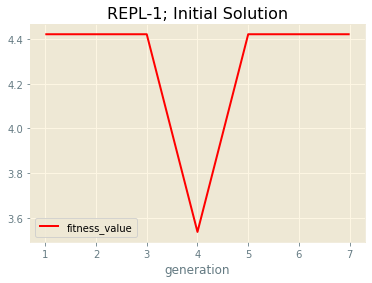

In [2]:
#%% visualization of fitness value versus generation
fit_val = []
import matplotlib.style as style
import pandas as pd
df = pd.DataFrame()

gnr = 8
for r in range (1,gnr):
    fit_val.append(ga_continuous(10, 0.9 , 0.3, r))

df = pd.DataFrame({'fitness_value':fit_val})
list_1 = range(1,gnr)

df['generation'] = list_1
style.use('Solarize_Light2')
df.plot(kind='line',x='generation',y='fitness_value', color = 'r', title = "REPL-1; Initial Solution")

#%% min of z function 
min_z = min(fit_val)
print(min_z)

